# Basics of Reading and Plotting Data 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#Download the data from the given url to be processed
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

#modules can be used to download the data, but i have done so manually

In [4]:
#Reading the data
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
#Data Exploration

#First we select some of the features to explore more
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


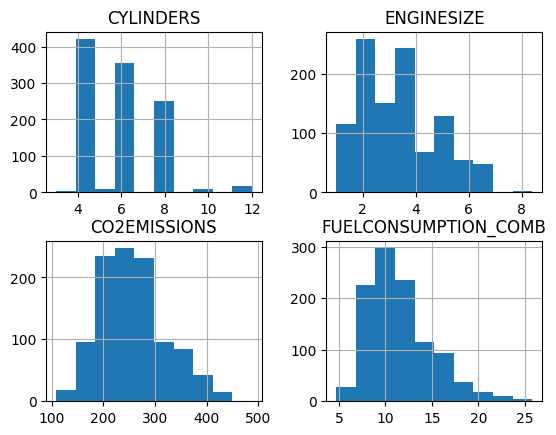

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

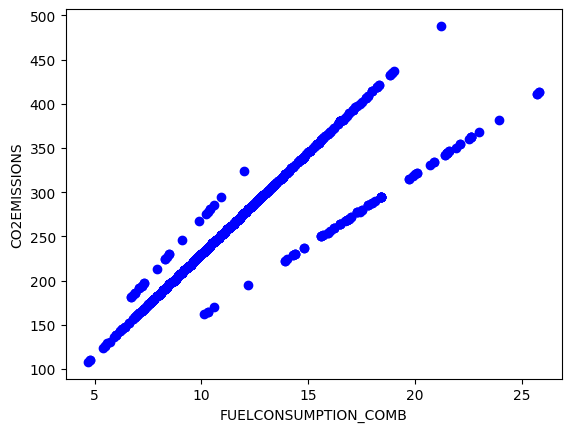

In [9]:
#Now we are plotting them against each of their emission values to see how linear they are
plt.scatter(x=cdf.FUELCONSUMPTION_COMB, y=cdf.CO2EMISSIONS,c='blue')

plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")

plt.show()

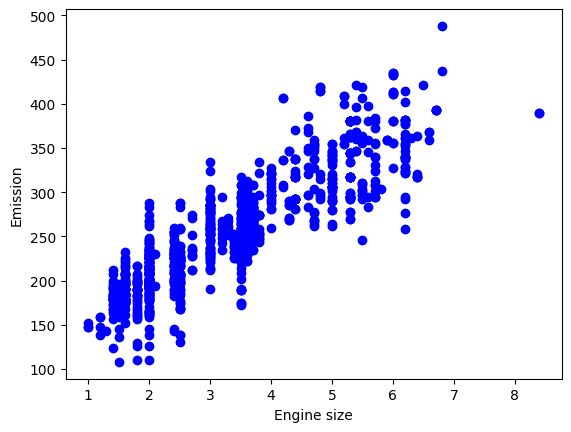

In [11]:
#Plotting engine size(x) against emission(y)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

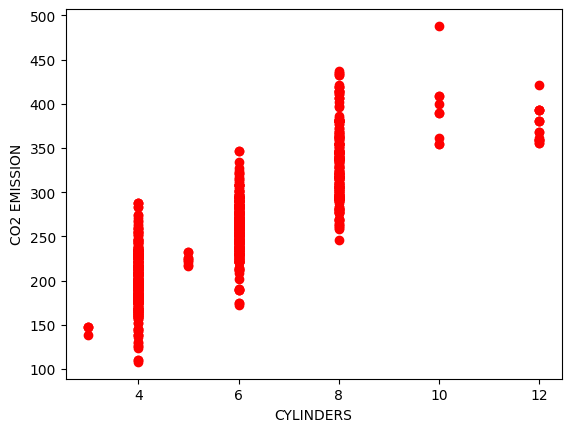

In [14]:
#Practice : Plot cylinder vs emission data
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,c='red')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSION')
plt.show()

# Creating Train Test Datasets

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function: 

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(type(train))


<class 'pandas.core.frame.DataFrame'>


## Simple Regression Model

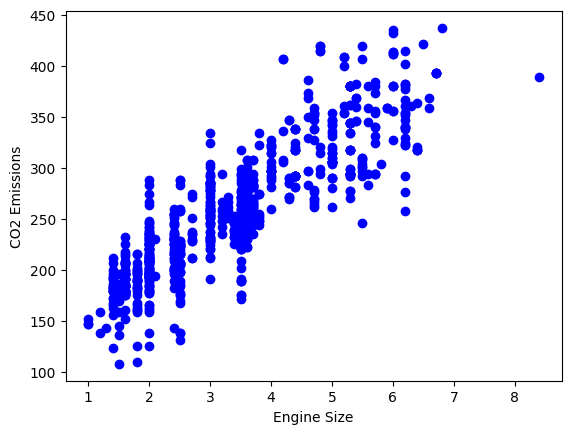

In [17]:
#train data dsit.
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,c='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

## Simple Linear Regression

### Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

## Modelling (Using sklearn)

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression() #Initialize model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

#Printing the coefficients
print('Coefficients : ', regr.coef_)
print('Intercept : ', regr.intercept_)

Coefficients :  [[38.73459618]]
Intercept :  [127.23388842]


Text(0, 0.5, 'Emission')

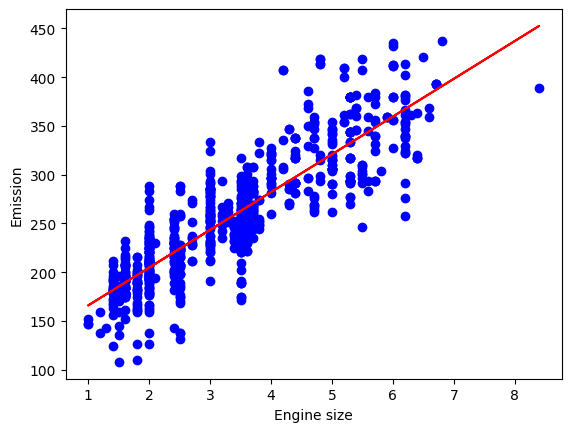

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Now we compare he values from train data and the test data

### Now we need to find
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error
4. R squared Value

In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#We gonna predict the data on the y axis
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.53
Residual sum of squares (MSE): 960.49
R2-score: 0.79


## Assignment

In [21]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])

regr.fit(train_x,train_y) #Train the model on the training data

LinearRegression()

In [26]:
predictions = regr.predict(test_x)
# print(predictions)
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))
print("Mean Squared Error: %.2f" %np.mean(np.absolute(predictions-test_y)**2))

Mean Absolute Error: 20.91
Mean Squared Error: 809.50
